# Laboratorio 4 - Parte 2

### Redes Neuronales Artificiales: RNN y SOM

### 2018-II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

#### Primer Integrante:
Alejandro Castaño Rojas
#### Segundo Integrante:
Angélica Arroyave Mendoza

In [59]:
from __future__ import division
import numpy as np
import math
import matplotlib.pyplot as plt
#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")
%matplotlib inline

## Ejercicio 1

En este ejercicio vamos a utilizar dos bases de datos diferentes para entrenar dos mapas auto-organizables. En primer lugar usaremos la base de datos iris y posteriormente la base de datos de dígitos escritos.  Si bien en estas dos bases de datos las muestras cuentan con etiquetadas de salida, las vamos a usar para evaluar el agrupamiento que produce un SOM, es decir que no usaremos las etiquetas e intentaremos que el modelo descubra los grupos de muestras similares que hay en los datos. Tenga en cuenta el número de clases en cada una de las bases de datos para los análisis posteriores.

In [60]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data

#Definimos una lista de colores de acuerdo con las clases originales
colors = ["red"] * 50
colors.extend(["green"] * 50)
colors.extend(["blue"] * 50)

Para el trabajo usaremos el paquete somoclu (use la instrucción pip install sumoclu), los parámetros de la función los pueden consultar en : https://somoclu.readthedocs.io/en/stable/reference.html. 

Complete el siguiente código para entrenar un SOM con los datos almacenados en la variable Xn (Datos normalizados), use una cuadrícula de neuronas de 100 por 120 y un número de épocas igual a 100. Adicionalmente use las opciones maptype="toroid" y compactsupport=False, para una mejor visualización de los resultados.

In [39]:
!pip install somoclu

In [40]:
from numpy import random
import somoclu
from sklearn.preprocessing import StandardScaler
random.seed(19680801)
scaler = StandardScaler()
Xn = scaler.fit_transform(X);


som = somoclu.Somoclu(120, 100, maptype='toroid', gridtype='rectangular', compactsupport=False)

som.train(Xn, epochs=100 )

Una vez entrenado el modelo ejecute la siguiente celda, la cuál grafica la matriz U extraída del SOM:

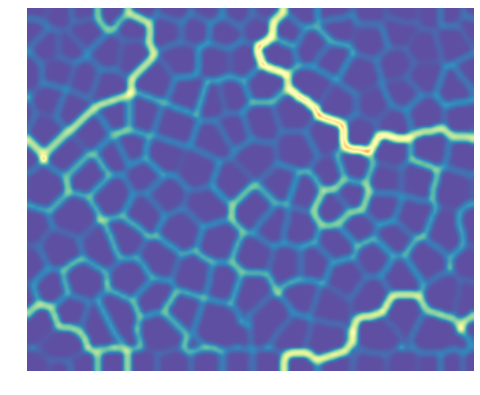

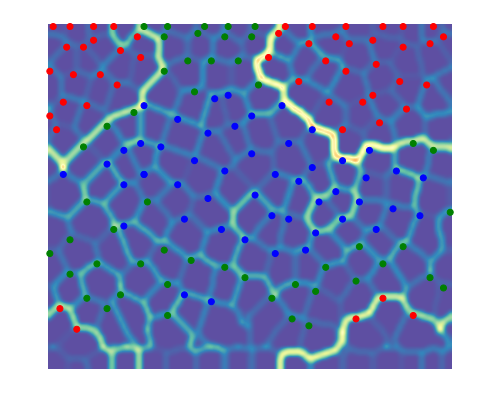

<module 'matplotlib.pyplot' from '/home/angelica/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [41]:
som.view_umatrix()
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

Responda:

1.1 ¿Qué es la matrix U (En inglés U-matrix) de un SOM? <br>
**R//** Es un tipo de repreentación para un SOM que permite visualizar las distancias entre neuronas. Las partes clara pueden verse como clusters y las oscuras como separadadores. Esta representación nos sirve cuando instentamos encontrar agrupamientos respecto a los datos de entrada sin tener ninguna información apriori. 

https://users.ics.aalto.fi/jhollmen/dippa/node24.html

1.2 ¿Cómo se pueden interpretar las gráficas obtenidas en el punto anterior? Describa detalladamente lo que observa e interprételo de acuerdo con la definición que dio en el punto 1.1 <br>
**R//** El objetivo de la representación U-matrix es visualizar los agrupamientos mediante las distancias (que tanto se parece una muestra a otra), lo que vemos de color más claro puede verse como la relación de una muestra respecto a otras, así podemos notar hasta que punto (muestra) se parecen.

Ejecute la siguiente instrucción:

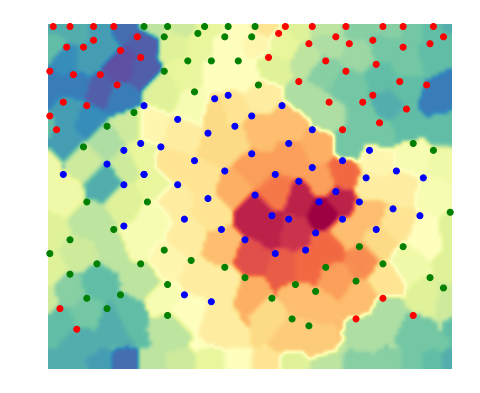

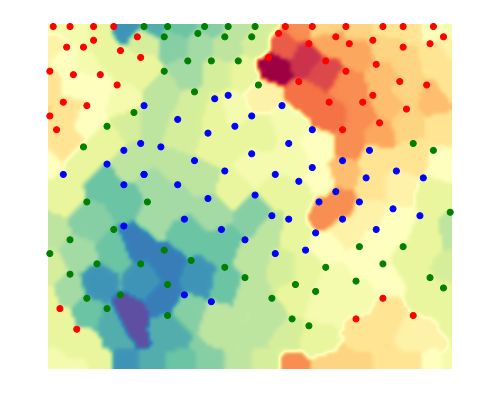

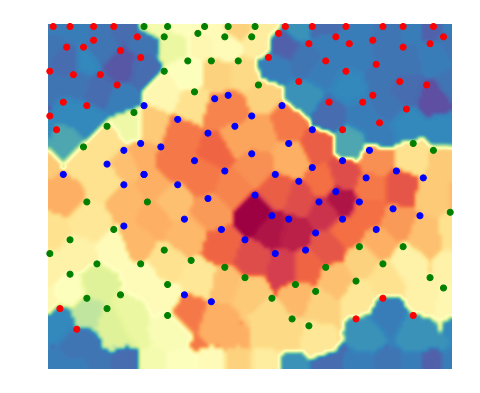

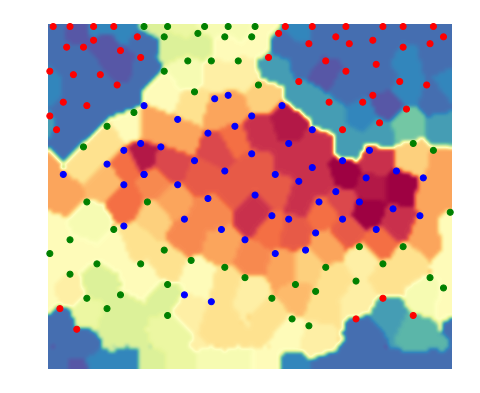

<module 'matplotlib.pyplot' from '/home/angelica/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [42]:
som.view_component_planes(bestmatches=True,bestmatchcolors=colors)

Responda:

1.3 ¿Qué se está gráficando en las figuras? <br>
**R//** Lo que se grafica en las figuras es la agrupación por componentes de los datos.

1.4 ¿Qué utilidad tienen las gráficas anteriores? <br>
**R//** Estas gráficas nos permiten visualizar el comportamiento de los datos y sus relaciones.

1.5 ¿De acuerdo con las gráficas anteriores cuáles variables en el problema están correlacionadas? <br>
**R//** De acuerdo al  view component planes y su documentacion, las variables más correlacionadas son aquellas las cuales son más similares.

## Ejercicio 2

Repita el proceso anterior para los datos del problema de reconocimiento de dígitos escritos a mano. Ejecute la siguiente celda para cargar los datos

In [24]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits(n_class=4)

#--------- preprocesamiento--------------------
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)

#---------- Datos a usar ----------------------
X = data
Y = digits.target

#Definimos una lista de colores de acuerdo con las clases en Y
color = []
for i in range(len(Y)):
    if Y[i] == 0:
        color.append('red')
    elif Y[i] == 1:
        color.append('blue')
    elif Y[i] == 2:
        color.append('green')
    elif Y[i] == 3:
        color.append('yellow')

/home/angelica/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/angelica/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/angelica/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/angelica/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/angelica/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed

Entrene un SOM a partir de los datos cargados en la celda anterior. En este caso utilice un SOM con una capa de neuronas de dimension 150 por 150.

In [25]:
random.seed(19680801)
scaler = StandardScaler()
Xn = scaler.fit_transform(X);

som = somoclu.Somoclu(150, 150, maptype='toroid', gridtype='rectangular', compactsupport=False)

som.train(Xn, epochs=100 )

Una vez entrenado el SOM, ejecute la siguiente celda

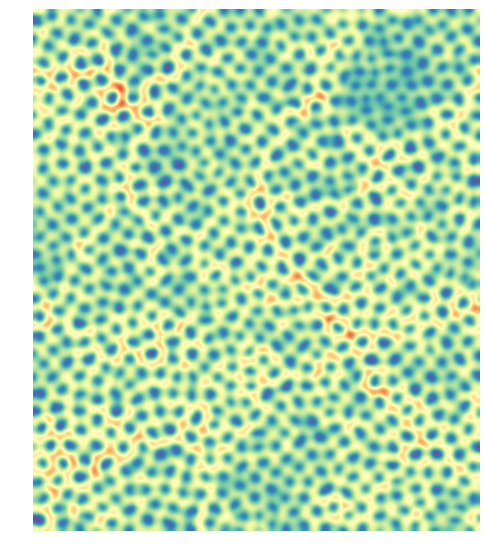

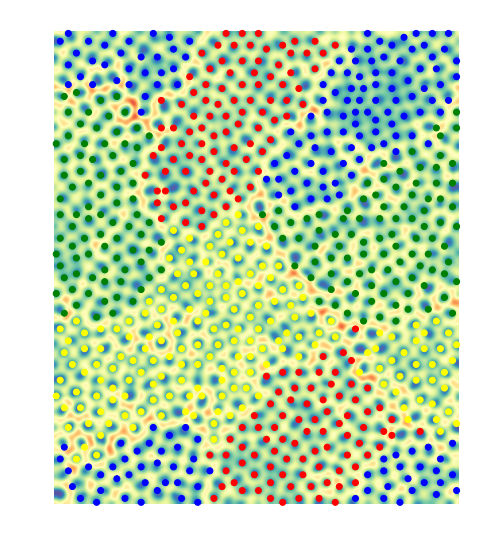

<module 'matplotlib.pyplot' from '/home/angelica/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [27]:
som.view_umatrix()
som.view_umatrix(bestmatches=True, bestmatchcolors=color)

Responda:

2.1 ¿Qué diferencia observa entre la matrix U en este caso vs el anterior? <br>
**R//** La diferencia más notoria entre este caso y el anterior son el número de clases de ambas muestras en el que para el dataset iris se encontraron 3 clases y para reconocimiento de dígitos escritos a mano encontramos 4 clases. Otra de las diferencias es la disperción que tienen los datos es más notoria en el caso 1 que en el 2. <br>
2.2 ¿Qué puede concluir a partir de la gráfica que incluye la ubicación de las neuronas ganadoras para cada muestra de entrada? <br>
**R//**

## Ejercicio 3

En este ejercicio entrenaremos una Red Neuronal Recurrente para la predicción de una serie de tiempo. Este problema corresponde a una configuración many-to-many. En este caso usaremos una serie de tiempo que corresponde al número de pasajeros internacionales por mes, desde el año 1949 hasta el año 1960. La serie de tiempo puede ser consultada en: https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line 

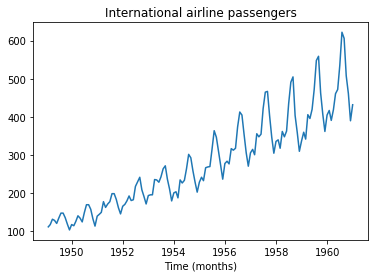

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('DB/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
#---- Tiempos para los datos originales---
date_begin = np.datetime64('1949-01')
date_end = np.datetime64('1961-01')
Time = pd.date_range(date_begin, date_end, freq='M')

plt.plot(Time,dataset)
plt.title('International airline passengers')
plt.xlabel('Time (months)')
plt.show()

El paquete que usaremos en este caso para el entrenamiento de redes neuronales recurrentes es neurolab (use la instrucción pip install neurolab), la documentación puede ser consultada en : https://pythonhosted.org/neurolab/.

In [80]:
!pip install neurolab

In [74]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

#Mean Absolute Percentage Error para los problemas de regresión
def MAPE(Y_est,Y):
    N = np.size(Y)
    mape = np.sum(abs((Y_est.reshape(N,1) - Y.reshape(N,1))/Y.reshape(N,1)))/N
    return mape 

3.1 Complete el código siguiente y entrene una red neuronal recurrente de Elman, con una capa oculta y una capa de salida. Use función de activación tangente hiperbólica para la capa oculta y lineal para la capa de salida. Use un número de épocas igual a 1000, y un objetivo de error inferior a 0.00001. Inicialice los pesos de las capas aleatoriamente entre [-0.1, 0.1].

In [93]:
import neurolab as nl
from sklearn.preprocessing import MinMaxScaler
random.seed(19680801)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def run_elman_neural_network(look_back, number_of_neurons_per_layer):
    # reshape into X=t-look_back+1:t and Y=t+1
    look_back = look_back # Retardos de tiempo por muestra
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)

    #Esta variable se requiere para definir la red de acuerdo con la librería neurolab. Define el número de entradas y el rango de valores que toma cada entrada
    layers = []
    for i in range(look_back):
        layers.append([0, 1])
    # Crear la red e inicializar los pesos. 
    net =  nl.net.newelm(layers, [number_of_neurons_per_layer,1], [nl.trans.TanSig(), nl.trans.PureLin()])
    for n_layer in range(len(net.layers)):
        net.layers[n_layer].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
    net.init()
    #print("Neuronas de entrada: ", net.ci)
    #print("Número de capas (incluyendo capas ocultas y capa de salida): ", len(net.layers))
    #print("Neuronas de salida: ", net.co)
    trainY = trainY.reshape((trainY.shape[0], 1))
    target = trainY
    # Entrenar la red con los datos de entrenamiento
    error = net.train(trainX, trainY, epochs=1000, goal=0.00001)
    # Evaluar la red con los datos de test
    output = net.sim(testX)
    # Calculo de error
    Error = MAPE(output,testY)
    mape = np.mean(Error)
    print('Look back: ' + str(look_back) + ' | Number of neurons: ' + str(number_of_neurons_per_layer) + ' | MAPE = ' + str(mape))
    return mape, error, output, target

nn_mapes = []
nn_errors = []
nn_outputs = []
nn_targets = []
nn_look_backs = []
nn_neurons = []
for defined_look_back in range(1,5):
    for defined_number_of_neurons in range(5,31,5):
        answers = run_elman_neural_network(defined_look_back, defined_number_of_neurons)
        nn_mapes.append(answers[0])
        nn_errors.append(answers[1])
        nn_outputs.append(answers[2])
        nn_targets.append(answers[3])
        nn_look_backs.append(defined_look_back)
        nn_neurons.append(defined_number_of_neurons)

Epoch: 100; Error: 0.018288540656380397;
Epoch: 200; Error: 0.0024964411953478163;
Epoch: 300; Error: 0.0020820334814228153;
Epoch: 400; Error: 0.001930556768793353;
Epoch: 500; Error: 0.0019225934979861348;
Epoch: 600; Error: 0.0019158144400718503;
Epoch: 700; Error: 0.0019195792919242541;
Epoch: 800; Error: 0.0018952435289607923;
Epoch: 900; Error: 0.002090491939305284;
Epoch: 1000; Error: 0.0018801243847247878;
The maximum number of train epochs is reached
Look back: 1 | Number of neurons: 5 | MAPE = 0.12473276507035648
Epoch: 100; Error: 0.019129850748728836;
Epoch: 200; Error: 0.0022034695310905947;
Epoch: 300; Error: 0.0019478160799948528;
Epoch: 400; Error: 0.0019318520968805881;
Epoch: 500; Error: 0.0020829704659699735;
Epoch: 600; Error: 0.0019310975026413076;
Epoch: 700; Error: 0.0019093367423824385;
Epoch: 800; Error: 0.0019428256275226975;
Epoch: 900; Error: 0.0019000802605838214;
Epoch: 1000; Error: 0.0019159018081252811;
The maximum number of train epochs is reached
Look 

3.1 Haga una gráfica de la salida real vs la mejor predicción hecha por la red. Recuerde incluir los tiempos apropiados en el eje x y usar el método plt.legend() para identificar cuál es la serie real y cual la predicción.

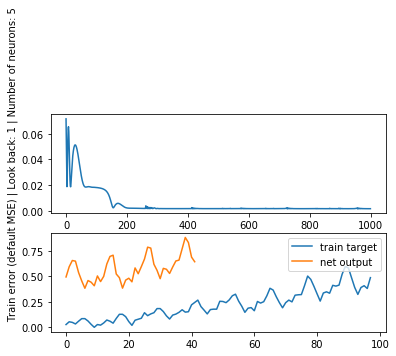

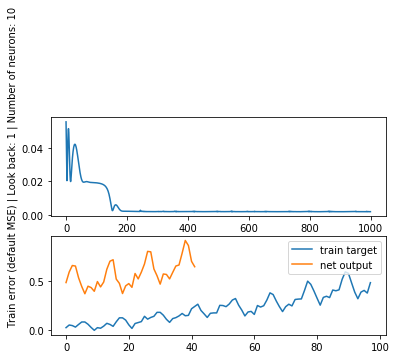

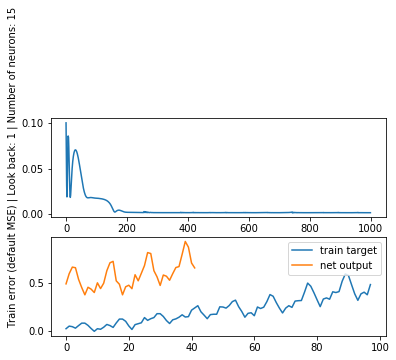

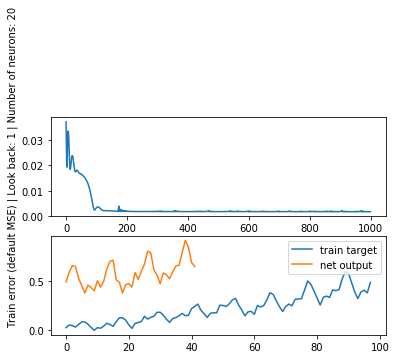

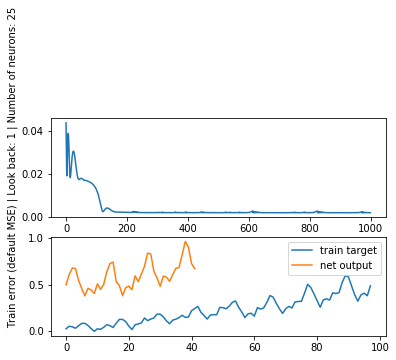

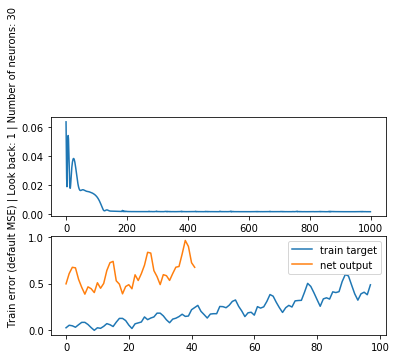

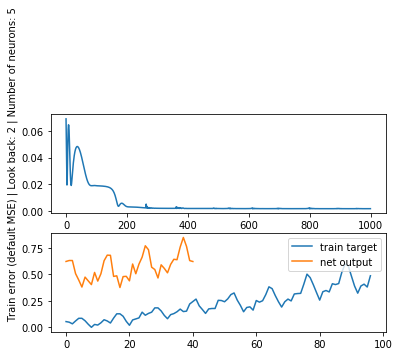

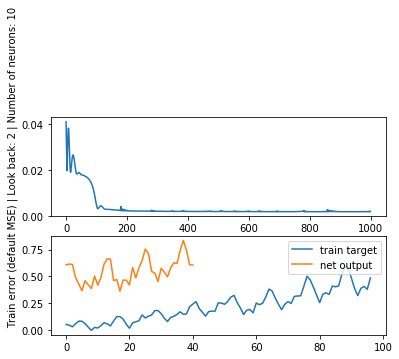

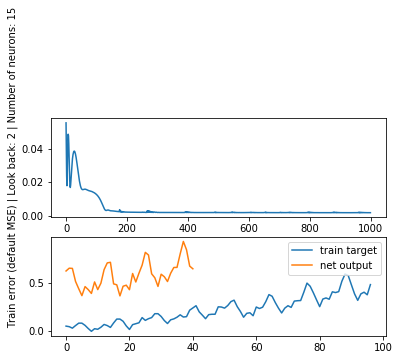

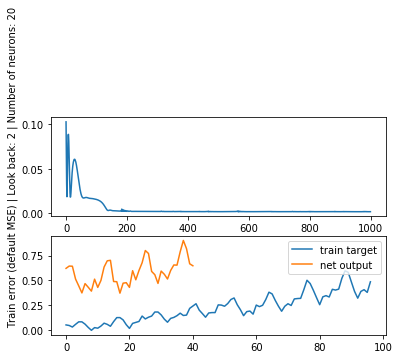

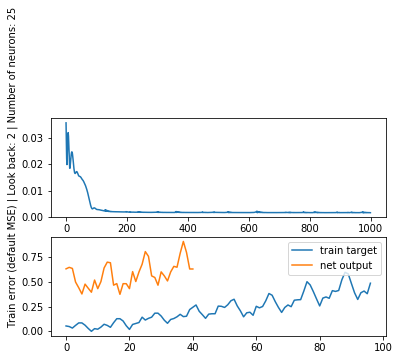

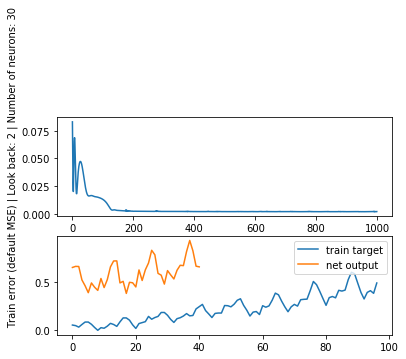

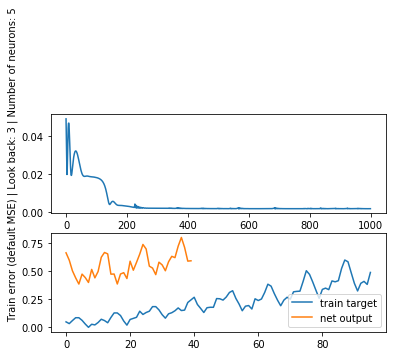

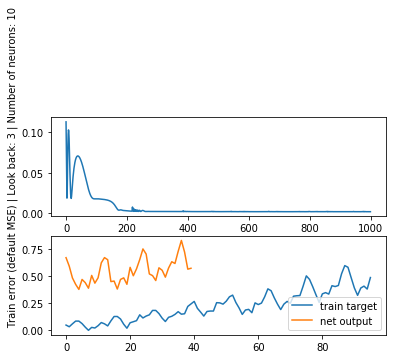

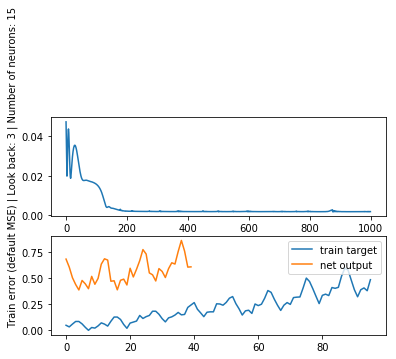

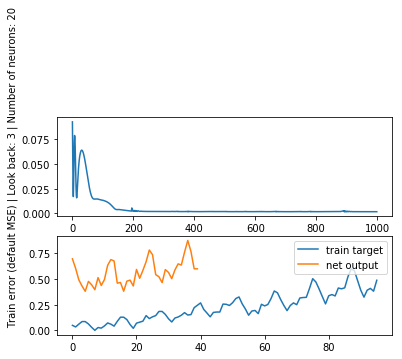

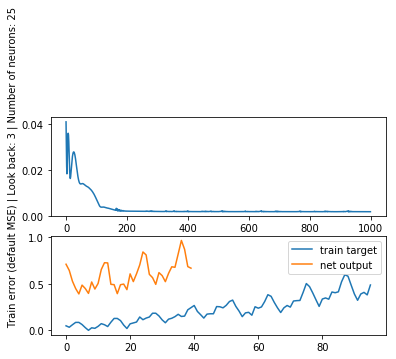

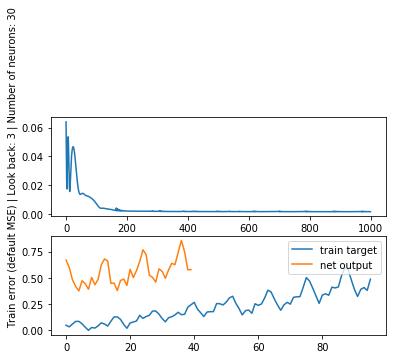

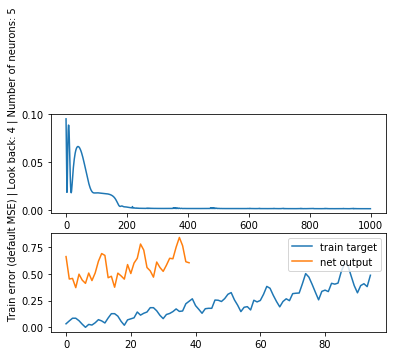

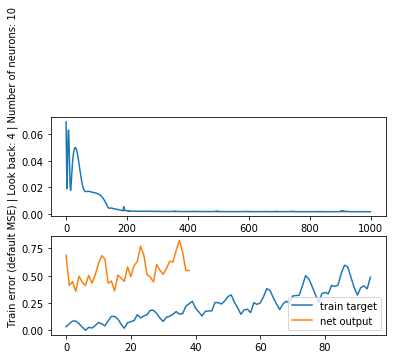

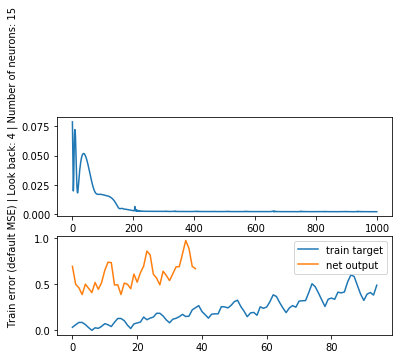

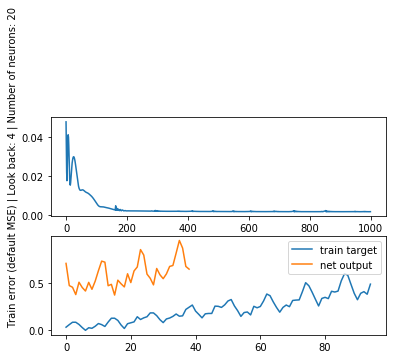

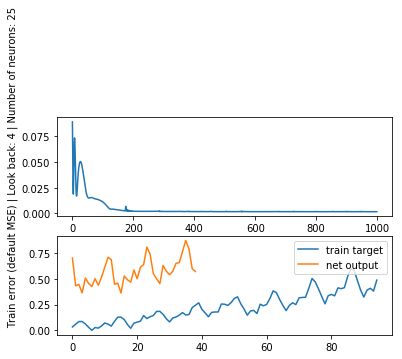

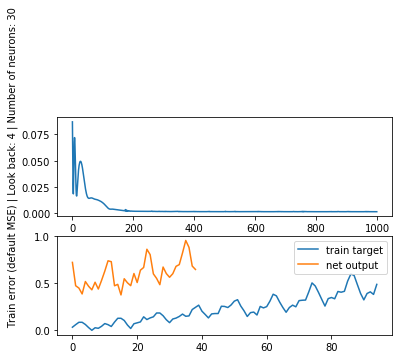

In [82]:
# Gráfica
import pylab as pl
for i in range(len(nn_errors)):
    pl.subplot(211)
    pl.plot(nn_errors[i])
    pl.xlabel('Epoch number')
    pl.ylabel('Train error (default MSE) | Look back: ' + str(nn_look_backs[i]) + ' | Number of neurons: ' + str(nn_neurons[i]))
    pl.subplot(212)
    pl.plot(nn_targets[i].reshape(nn_targets[i].shape[0]))
    pl.plot(nn_outputs[i].reshape(nn_outputs[i].shape[0]))
    pl.legend(['train target', 'net output'])
    pl.show()

3.2 Una vez compoletado el código realice los experimentos necesarios para llenar la siguiente tabla: 

**PUNTO 3**

In [94]:
import pandas as pd
import qgrid
df_types = pd.DataFrame({
    'Retardos de tiempo por muestra' : pd.Series([1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4]),
    'Neuronas por capa' : pd.Series([5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30])})
df_types["MAPE"] = ""
df_types.set_index(['Retardos de tiempo por muestra','Neuronas por capa'], inplace=True)
#df_types.sort_index(inplace=True)
for i in df_types.index:
    print(i[0], i[1])
    result= run_elman_neural_network(i[0], i[1])
    df_types["MAPE"][i] = result[0]
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

1 5
Epoch: 100; Error: 0.01924161231360539;
Epoch: 200; Error: 0.001992581436952584;
Epoch: 300; Error: 0.001921283572644081;
Epoch: 400; Error: 0.0019996619817076442;
Epoch: 500; Error: 0.0023921275934315075;
Epoch: 600; Error: 0.0019177704311338427;
Epoch: 700; Error: 0.0018809449161878713;
Epoch: 800; Error: 0.0018727374873203715;
Epoch: 900; Error: 0.0018696873147047708;
Epoch: 1000; Error: 0.0018673726500409084;
The maximum number of train epochs is reached
Look back: 1 | Number of neurons: 5 | MAPE = 0.12608075780061592
1 10
Epoch: 100; Error: 0.01855600034747471;
Epoch: 200; Error: 0.0026814312925794695;
Epoch: 300; Error: 0.00194734933181368;
Epoch: 400; Error: 0.0020536588428790386;
Epoch: 500; Error: 0.0019504981991309983;
Epoch: 600; Error: 0.00208841834626411;
Epoch: 700; Error: 0.0020683747660911376;
Epoch: 800; Error: 0.0018987664372496205;
Epoch: 900; Error: 0.0018795061240317213;
Epoch: 1000; Error: 0.0019199430850029835;
The maximum number of train epochs is reached
Lo

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [92]:
qgrid_widget.get_changed_df()

MAPE
Retardos de tiempo por muestra Neuronas por capa          
1                              5                  0.126081
                               10                  0.12635
                               15                 0.127726
                               20                 0.125468
                               25                 0.125651
                               30                 0.124328
2                              5                  0.121929
                               10                 0.124991
                               15                 0.119815
                               20                 0.119495
                               25                 0.124872
                               30                 0.117776
3                              5                  0.122053
                               10                 0.119368
                               15                 0.130709
                               20                 0.116517
                               25                 0.113813
                               30                 0.116097
4                              5                  0.119904
                               10                 0.128718
                               15                 0.120489
                               20                 0.121102
                               25                 0.121034
                               30                 0.119647

Responda:

3.3 ¿Cuál fue la mejor configuración encontrada?


In [96]:
min_error_index = nn_mapes.index(min(nn_mapes))
print("R// La mejor configuración encontrada fue con", nn_look_backs[min_error_index], "look back(s) y", nn_neurons[min_error_index], "neuronas, brindando un error (MAPE) de: 0.113813")

R// La mejor configuración encontrada fue con 3 look back(s) y 25 neuronas, brindando un error (MAPE) de: 0.113813


3.4 ¿Porqué seguir aumentando los tiempos de retardo no implica siempre una mejora en la predicción del modelo?

## *Ejercicio 4

Este ejercicio es opcional. Use una red neuronal tipo MLP para reolver el mismo problema de predicción del número de pasajeros y compare el resultado con el obtenido usando la red recurrente.